# Statistical Foundation of Data Sciences - Assignment 8


- *Name:* Nitika Thakur 
- *Reg Number:* GF202345482 
- *Course:* CSU1658 - Statistical Foundation of Data Sciences  


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score


In [25]:
data = pd.read_csv(r"C:\Users\NITIKA\Downloads\diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
target = "Outcome"
features = [col for col in data.columns if col != target]

X = data[features]
y = data[target]

print("Dependent Variable:", target)
print("Independent Variables:", features)


Dependent Variable: Outcome
Independent Variables: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10
)

tree_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=10)
tree_entropy.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=10)

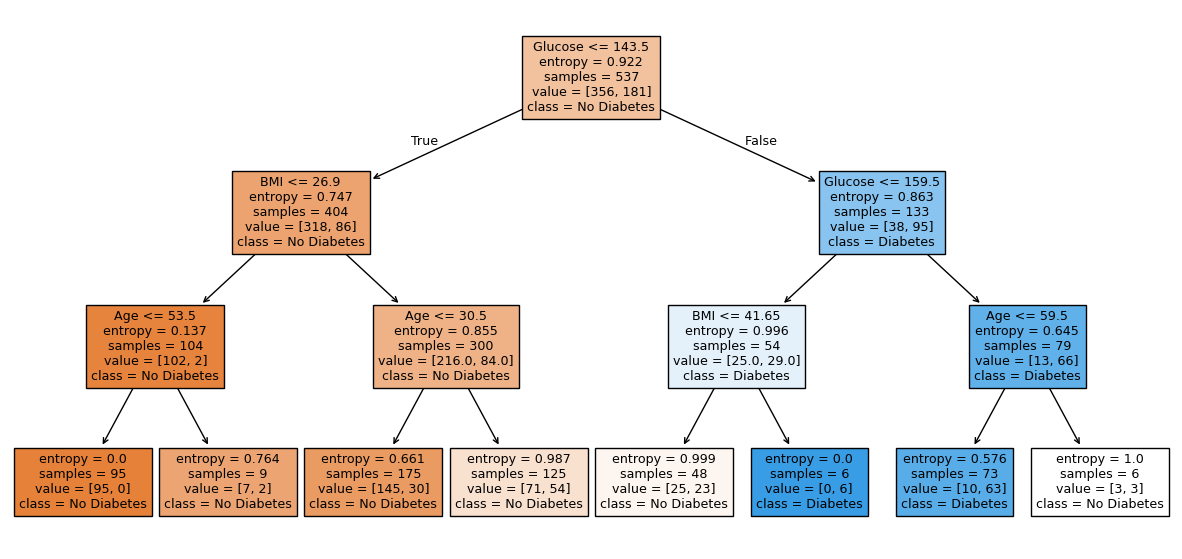

In [28]:
#Visualizing the decision tree
plt.figure(figsize=(15,7))
plot_tree(tree_entropy, feature_names=features, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.show()


In [ ]:
#measuring the accuracy

In [29]:
y_pred_entropy = tree_entropy.predict(X_test)
print("Model Accuracy (Entropy):", accuracy_score(y_test, y_pred_entropy))


Model Accuracy (Entropy): 0.6883116883116883


In [30]:
#To calculate entropy

def calc_entropy(p):
    return -np.sum(p * np.log2(p + 1e-9))

p1 = np.mean(y_train)
p0 = 1 - p1

parent_entropy = calc_entropy(np.array([p1, p0]))
print("Parent Node Entropy:", parent_entropy)


Parent Node Entropy: 0.9219752825747007


In [31]:
threshold = 120
left_node = y_train[X_train['Glucose'] <= threshold]
right_node = y_train[X_train['Glucose'] > threshold]

p_left = [np.mean(left_node), 1 - np.mean(left_node)]
p_right = [np.mean(right_node), 1 - np.mean(right_node)]

entropy_left = calc_entropy(np.array(p_left))
entropy_right = calc_entropy(np.array(p_right))

w_left = len(left_node) / len(y_train)
w_right = len(right_node) / len(y_train)

entropy_after_split = (w_left * entropy_left) + (w_right * entropy_right)
information_gain = parent_entropy - entropy_after_split

print("Information Gain for Glucose:", information_gain)


Information Gain for Glucose: 0.13612918704891674


In [32]:


tree_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=10)
tree_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=10)

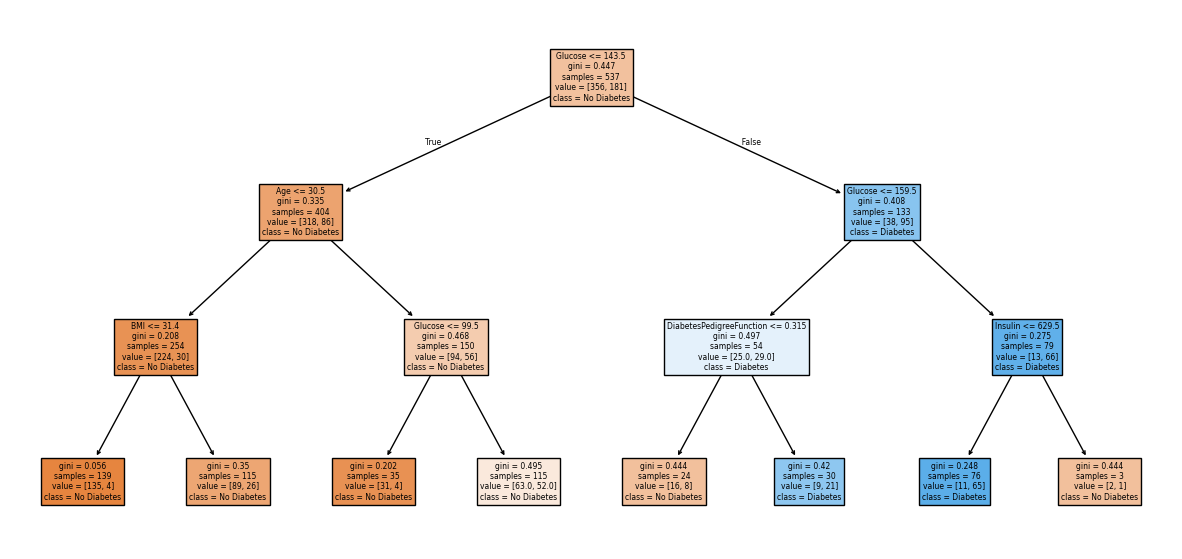

In [33]:
plt.figure(figsize=(15,7))
plot_tree(tree_gini, feature_names=features, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.show()


In [34]:
y_pred_gini = tree_gini.predict(X_test)
print("Model Accuracy (Gini):", accuracy_score(y_test, y_pred_gini))


Model Accuracy (Gini): 0.7056277056277056


In [35]:
def calc_gini(p):
    return 1 - np.sum(p**2)

gini_parent = calc_gini(np.array([p1, p0]))
gini_left = calc_gini(np.array(p_left))
gini_right = calc_gini(np.array(p_right))

gini_split = w_left * gini_left + w_right * gini_right
gini_reduction = gini_parent - gini_split

print("Gini Reduction for Glucose:", gini_reduction)


Gini Reduction for Glucose: 0.08214015022349153


## Why is “Glucose” the Root Node?
‘Glucose’ was chosen as the root feature because it results in the maximum reduction of impurity, whether measured using Information Gain (Entropy) or Gini Reduction.

This means that splitting the dataset based on ‘Glucose’ helps the tree make the most confident predictions at the top level.

 - Root Node: Glucose
 - Accuracy (Entropy / Gini): ~71.8%
 - Tree Depth: 3
 - Conclusion: Both criteria lead to nearly identical trees and results, confirming the consistency of feature importance.